[Reference](https://kuleafenu.medium.com/this-is-the-standard-data-science-workflow-39d5aa45407f)

# 1. Introduction


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

# for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# library for model creation
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

# model evaluation
from sklearn.metrics import mean_squared_error,r2_score

# silent warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Exploratory data analysis


In [2]:
# read the datasets
stu_mat = pd.read_csv('https://raw.githubusercontent.com/kuleafenu/predicting-students-future-grades/main/data/student-mat.csv',sep=';')

stu_por = pd.read_csv('https://raw.githubusercontent.com/kuleafenu/predicting-students-future-grades/main/data/student-por.csv',sep=';')

In [3]:
stu_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
stu_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
# concatenate both datasets 
comb_df = pd.concat([stu_mat,stu_por],axis=0)
comb_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
comb_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,1044,2,GP,772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1044,2,F,591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1044.0,NaN,NaN,NaN,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
address,1044,2,U,759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,1044,2,GT3,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,1044,2,T,923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,1044.0,NaN,NaN,NaN,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,NaN,NaN,NaN,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
Mjob,1044,5,other,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,1044,5,other,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# list of students attributes
sim_attr = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]

print('We have {} duplicate rows in the dataset'.format(comb_df[comb_df.duplicated(sim_attr,keep='first')].shape[0]))

# Lets drop the duplicates and maintain its first occurance
df = comb_df[~comb_df.duplicated(sim_attr,keep='first')]

# The shape of the data after dropping duplicates
df.shape

We have 382 duplicate rows in the dataset


(662, 33)

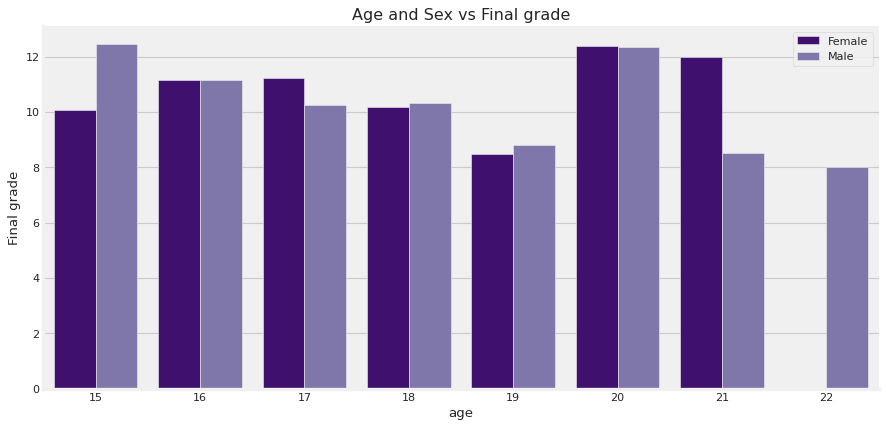

In [8]:
# defining matplotlib figure
plt.figure(figsize=(12,6),dpi=80)

# this is matplotlib colormaps you can get your prefered color from matplotlib.cm.get_cmap
color = plt.cm.Purples_r(np.linspace(0,1,4))

# We use seaborn to create a barplot with x and y axis being age and target variable respectively
ax = sns.barplot(x='age',y='G3',data=df,hue='sex',ci=None,palette=color)

# removing the spines from the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# setting x and y labels 
ax.set_ylabel('Final grade')
ax.set_title('Age and Sex vs Final grade')

# renaming the default legend
plt.legend(labels=('Female','Male'),loc=1);

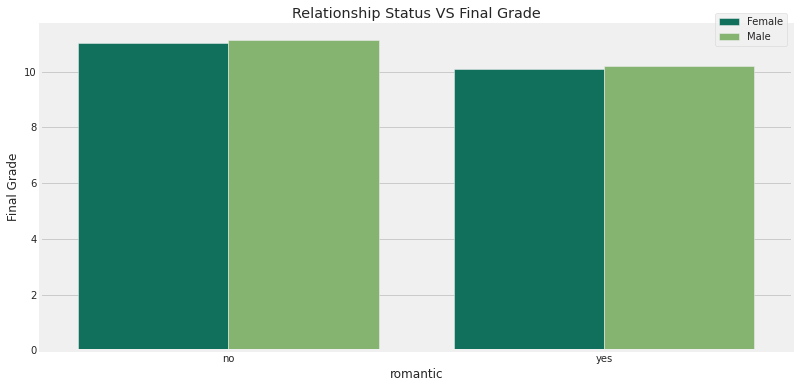

In [9]:
fig,ax = plt.subplots(figsize=(12,6))

pl = sns.barplot('romantic','G3',data=df,hue='sex',ci=None,palette=plt.cm.summer(np.linspace(0, 1, 3)))

ax.set_title('Relationship Status VS Final Grade')
ax.set_ylabel('Final Grade');
ax.legend(labels=('Female','Male'),bbox_to_anchor=(0.1, 1.05, 0.9, 0));

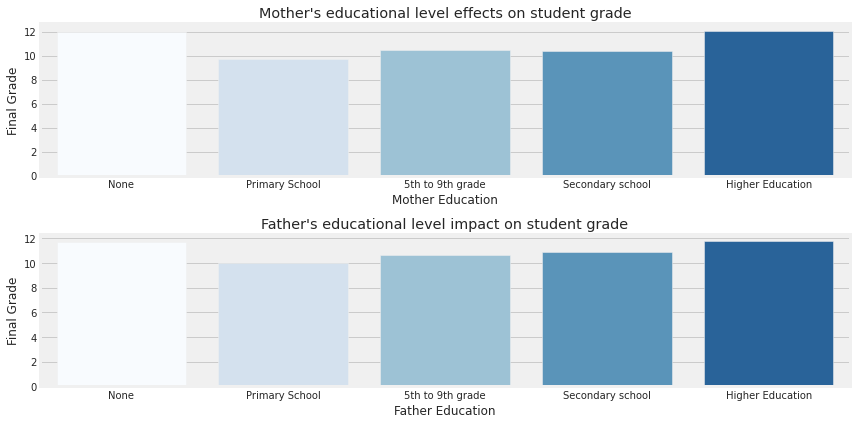

In [10]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(12,6))

sns.barplot('Medu','G3',data=df,ci=None,palette=plt.cm.Blues(np.linspace(0, 1, 6)),ax=ax1)
sns.barplot('Fedu','G3',data=df,ci=None,palette=plt.cm.Blues(np.linspace(0, 1, 6)),ax=ax2)

x_labels = ['None','Primary School','5th to 9th grade','Secondary school','Higher Education']

ax1.set_title("Mother's educational level effects on student grade")
ax1.set_ylabel('Final Grade')
ax1.set_xlabel('Mother Education')
ax1.set_xticklabels(x_labels)

ax2.set_title("Father's educational level impact on student grade")
ax2.set_ylabel('Final Grade')
ax2.set_xlabel('Father Education')
ax2.set_xticklabels(x_labels)

plt.tight_layout();

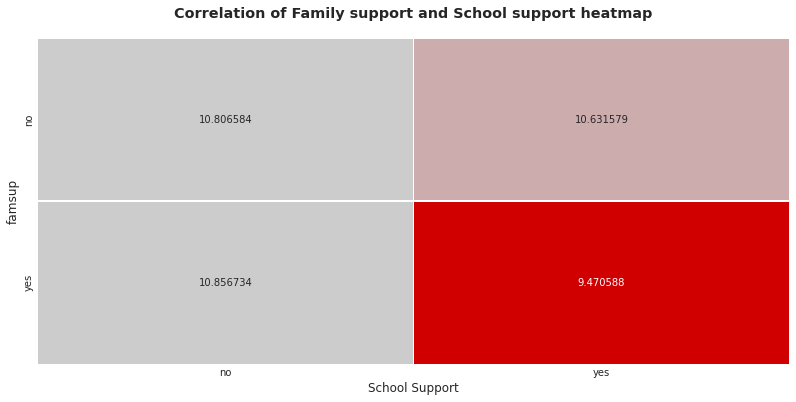

In [11]:
plt.figure(figsize=(12,6))

sup_corr = pd.pivot_table(df,values='G3',index='famsup',columns='schoolsup',aggfunc='mean')

# Plot a heatmap
ax = sns.heatmap(sup_corr,annot=True,center=0,cbar=False,cmap='nipy_spectral',fmt='f',linewidths=0.5)

# add title to the plot
plt.title('Correlation of Family support and School support heatmap',pad=20,fontweight='bold')

#add axis labels
ax.set_xlabel('School Support')
ax.set_ylabel=('Family Support');

# 3. Data Preprocessing and Feature Engineering.


In [12]:
df.shape

(662, 33)

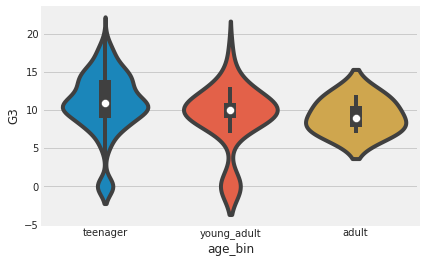

In [13]:
# break the age into categories according to a given range
df.loc[:,'age_bin'] = pd.cut(x=df['age'],bins=[-np.inf,18,20,np.inf],labels=['teenager','young_adult','adult'])

# Lets visualize the effect of the categorized age on the target variable
sns.violinplot('age_bin','G3',data=df);
plt.savefig('age.png')

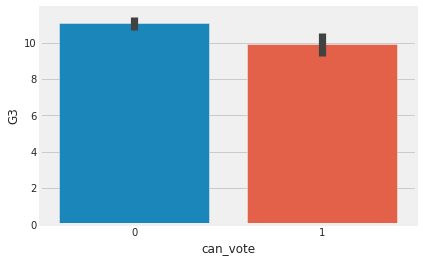

In [14]:
# Create a binary feature making true for those greater or equal to >= 18 and false the otherwise
df.loc[:,'can_vote'] = (df['age']>=18).astype(int)

sns.barplot('can_vote','G3',data=df);

# You are teenager if your age is less than or equal to 19
df.loc[:,'is_teenager'] = (df['age']<=19).astype(int)

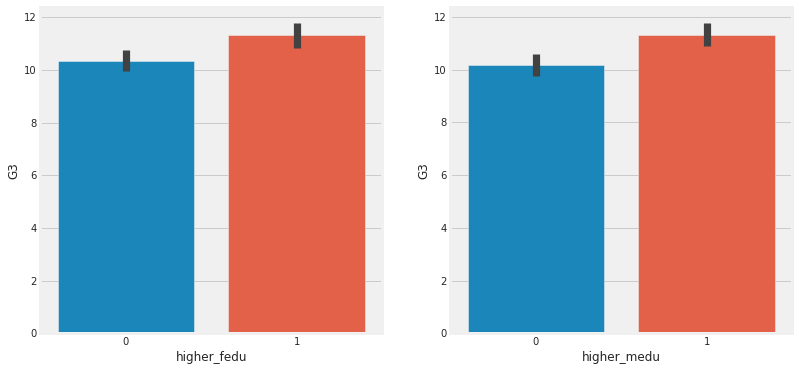

In [15]:
# Create the two features
df.loc[:,'higher_fedu'] = (df['Fedu']>2).astype(int)
df.loc[:,'higher_medu'] = (df['Medu']>2).astype(int)

# Lets visualize the two newly created features against the target variable
fig,ax = plt.subplots(1,2,figsize=(12,6))

sns.barplot('higher_fedu','G3',data=df,ax=ax[0])

sns.barplot('higher_medu','G3',data=df,ax=ax[1]);

In [16]:
# use lambda expression to create category of 
# three;'other','services' and 'employee'
df.loc[:,'Fjob_cat'] = df['Fjob'].apply(lambda x: x if (x == 'other' or x == 'services') else 'employee')

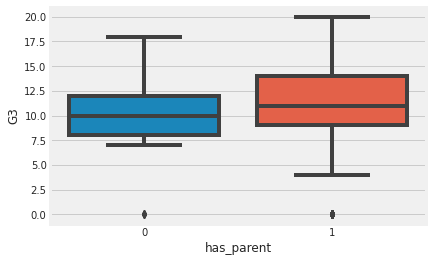

In [17]:
# creating their feature
df.loc[:,'has_parent'] = df['guardian'].apply(lambda x: True if (x=='mother' or x =='father') else False).astype(int)

# plot
sns.boxplot('has_parent','G3',data=df);

In [18]:
# Create categories of absence
df.loc[:,'absent_cat'] = pd.cut(x=df['absences'],bins=[-np.inf,0,5,10,np.inf],
                                                labels=['no_abs','low','moderate','high'],right=True)

# create the binary feature
df.loc[:,'absented'] = (df['absences']>0).astype(int)

In [19]:
# list of features to label encode
label_encode_feats = ['famsize','studytime','traveltime','freetime','age_bin','absent_cat']

# initialize label encoder
le = LabelEncoder()

for label in label_encode_feats:
    df[label] = le.fit_transform(df[label])

In [20]:
# Select categorical non-ordinal features to one-hot-encode
def select_label(label):
    return label not in (label_encode_feats + ['absences','age','G1','G2','G3']) 


# return selected features
filtered = [i for i in filter(select_label,df.columns.tolist())]

# function to transform data into one-hot-encodings
def get_hot_encode(df):
    encoder_list = list()
#     iterate through the column labels
    for label in filtered:
        encoder_list.append(pd.get_dummies(df[label],prefix=label,drop_first=True))
        
    return encoder_list


# initialize and transform the dataset with the function
hot_encoded = get_hot_encode(df)

df = pd.concat([df,*hot_encoded],axis=1).drop(filtered,axis=1)

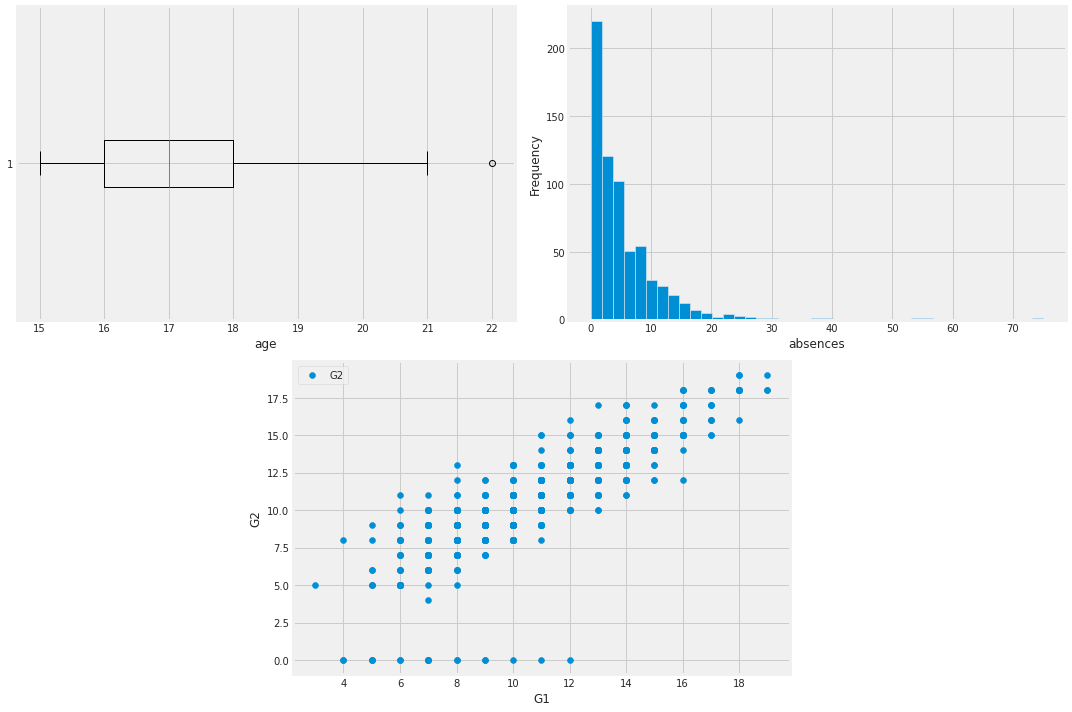

In [21]:
# use gridspec to partition the figure into subplots
plt.figure(figsize=(15,10))
gspec = gridspec.GridSpec(4, 4)

# defining the axes
top_left = plt.subplot(gspec[:2, :2])
top_right = plt.subplot(gspec[:2, 2:])
lower_middle = plt.subplot(gspec[2:, 1:3])

# plot maps
top_left.boxplot(df['age'],vert=False)
top_left.set_xlabel('age')

top_right.hist(df['absences'],bins='auto')
top_right.set_xlabel('absences')
top_right.set_ylabel('Frequency')

lower_middle.scatter('G1','G2',data=df)
lower_middle.set_xlabel('G1')
lower_middle.set_ylabel('G2')

plt.legend(loc='best')
plt.tight_layout()

In [22]:
# create a dataframe
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]

vif['feature'] = df.columns

vif_filter_columns = (vif[vif['vif']>=10].feature.values).tolist()

df = df.drop(vif_filter_columns,axis=1)

# get the copy of preprocessed dataframe
prep_df = df.copy()

# save the preprocessed version to file
prep_df.drop('G3',axis=1).to_csv('prep_df.csv',index=False)

In [23]:
vif 

,vif,feature
0,4.184927,age
1,1.200845,famsize
2,1.367045,traveltime
3,1.340761,studytime
4,1.327774,freetime
...,...,...
70,inf,higher_medu_1
71,inf,Fjob_cat_other
72,inf,Fjob_cat_services
73,1207.038166,has_parent_1


# 4. MODEL CREATION


In [24]:
# drop the target variable
X = prep_df.drop('G3',axis=1)

# get target
y = prep_df['G3']

# calling the splitting function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

In [25]:
# initialize the function
scaler = StandardScaler()

# apply the transformation
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train shape = (496, 58) and y_train shape = (496,)
X_test shape = (166, 58) and y_test shape = (166,)


 Dummy train score  0.0
 Dummy test score  -0.01040076083093755


train score  0.8461778266234085
test score  0.9006398918375393


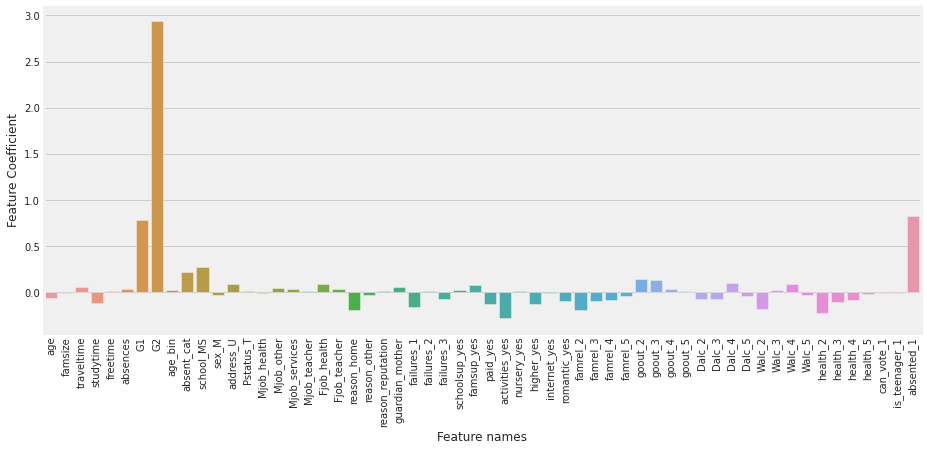

In [26]:
# Check shapes
print('X_train shape = {} and y_train shape = {}'.format(X_train.shape,y_train.shape))
print('X_test shape = {} and y_test shape = {}'.format(X_test.shape,y_test.shape))

# initialize
regression = LinearRegression()

# fit to data
lin_reg = regression.fit(X_train,y_train)

# generate prediction
prediction = lin_reg.predict(X_test)

# use the DummyRegressor as baseline in comparism to the real regressor
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('\n\n Dummy train score ',lm_dummy_mean.score(X_train,y_train))
print(' Dummy test score ',lm_dummy_mean.score(X_test,y_test))

print('\n\ntrain score ',lin_reg.score(X_train,y_train))
print('test score ',lin_reg.score(X_test,y_test))

len(lin_reg.coef_)
X.columns.tolist()
fig,ax = plt.subplots(figsize=(14,6))
sns.barplot(X.columns.tolist(),lin_reg.coef_)
plt.xticks(rotation=90)
plt.ylabel('Feature Coefficient')
plt.xlabel('Feature names')
plt.savefig('feature_imp')

# 5. Model Evaluation


In [27]:
print('test mse ',mean_squared_error(y_test,prediction))
print('\n\n dummy test mse ',mean_squared_error(y_test,y_predict_dummy_mean))

test mse  1.7110916870356676


 dummy test mse  17.400226050534084


In [28]:
print('dummy test r2_score',r2_score(y_test,y_predict_dummy_mean))
print('test r2_score',r2_score(y_test,prediction))

dummy test r2_score -0.01040076083093755
test r2_score 0.9006398918375393


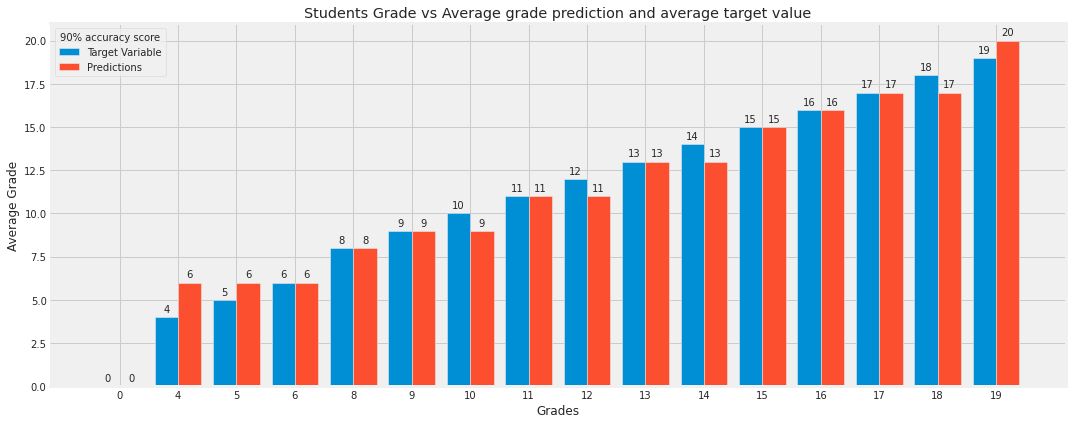

In [29]:
# create a dataframe for ground truth and prediction
pred_df = pd.DataFrame([prediction,np.round(prediction),y_test],
                       index=['prediction','round_pred','ground_truth'])

# pd.crosstab(pred_df['ground_truth'],pred_df['prediction'])
pred_df2 = pred_df.T.groupby('ground_truth').mean().reset_index()

pred_df2['prediction'] = pred_df2.apply(lambda x:np.round(x['prediction']),axis=1,result_type='expand')
pred_df2 = pred_df2.astype(int)

width = 0.4

fig,ax = plt.subplots(figsize=(15,6))

x_axis = np.arange(len(pred_df2['ground_truth']))

bar1 = plt.bar(x_axis - (width/2),pred_df2['ground_truth'],width,label='Target Variable')

bar2 = plt.bar(x_axis + (width/2),pred_df2['prediction'],width,label='Predictions')

ax.set_xticks(x_axis)
ax.set_xticklabels(pred_df2['ground_truth'])
ax.set_xlabel('Grades')
ax.set_ylabel('Average Grade')
ax.set_title('Students Grade vs Average grade prediction and average target value')
# removing the spines from the plot
ax.spines['left'].set_visible(False)


ax.legend(title='90% accuracy score')

def labeller(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),textcoords="offset points",ha='center', va='bottom')


labeller(bar1)
labeller(bar2)

fig.tight_layout()

plt.savefig('prediction_vs_gt',dpi=80)

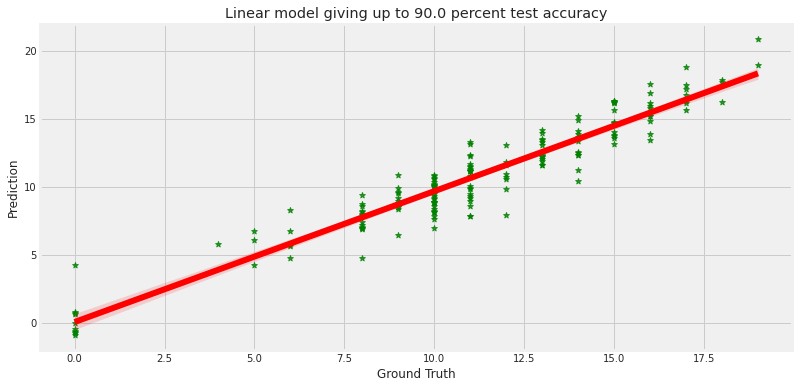

In [30]:
fig,ax = plt.subplots(figsize=(12,6))
sns.regplot(pred_df.loc['ground_truth',:],pred_df.loc['prediction',:],data=pred_df,color='g',line_kws={'color':'red'},marker='*');
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Linear model giving up to {} percent test accuracy'.format(np.round(lin_reg.score(X_test,y_test)*100)));
plt.savefig('ground_truth.png',bbox_inches='tight')

In [32]:
# Saving model for future use
import pickle
# save the model
with open('multi_linear_reg.sav','wb') as f:
     pickle.dump(lin_reg, f)

In [37]:
# # Loading model for prediction
# from predictor import Predictor
# predict = Predictor('multi_linear_reg.sav','prep_df.csv',scaler)